In [1]:
import scanpy as sc

In [11]:
adata = sc.read_h5ad('push_target.h5ad')

In [12]:
adata

AnnData object with n_obs × n_vars = 4725 × 2000
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot', '_scvi_batch', '_scvi_labels', 'dpt_pseudotime'
    uns: 'neighbors', 'umap'
    obsm: 'X_emb', 'X_new', 'X_umap'
    obsp: 'connectivities', 'distances'

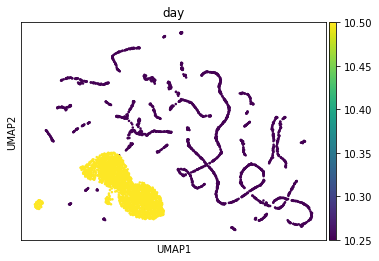

In [13]:
sc.pp.neighbors(adata, use_rep='X_new')
sc.tl.umap(adata)
sc.pl.umap(adata, color='day')

In [14]:
adata_1 = sc.read_h5ad('source_target.h5ad')

In [15]:
adata_1

AnnData object with n_obs × n_vars = 4725 × 2000
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot', '_scvi_batch', '_scvi_labels', 'dpt_pseudotime'
    uns: 'diffmap_evals', 'iroot', 'log1p', 'neighbors', 'umap'
    obsm: 'X_diffmap', 'X_emb', 'X_umap'
    obsp: 'connectivities', 'distances'

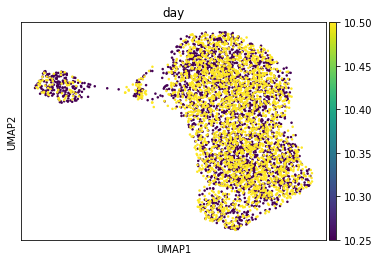

In [16]:
del adata_1.uns['diffmap_evals']
del adata_1.obsm['X_diffmap']
del adata_1.uns['iroot']
sc.pp.neighbors(adata_1, use_rep='X_emb')
sc.tl.umap(adata_1)
sc.pl.umap(adata_1, color='day')

In [38]:
import anndata as ad
adata_pca = ad.AnnData(adata.obsm['X_new'])
adata_pca.obs['day'] = adata.obs['day'].values
sc.pp.pca(adata_pca, n_comps=49)
adata_pca

AnnData object with n_obs × n_vars = 4725 × 50
    obs: 'day'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

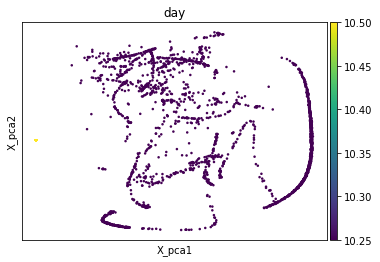

In [39]:
sc.pl.embedding(adata_pca, basis='X_pca', color='day')

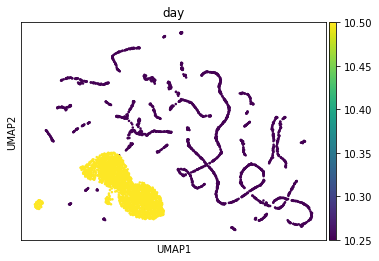

In [41]:
sc.pp.neighbors(adata_pca)
sc.tl.umap(adata_pca)
sc.pl.umap(adata_pca, color='day')

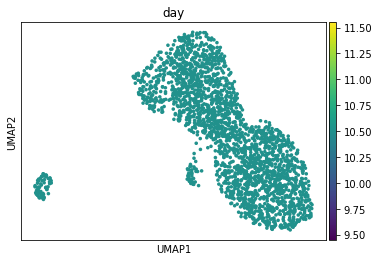

In [42]:
adata_50 = adata_pca[adata_pca.obs.day==10.50]
sc.pl.umap(adata_50, color='day')

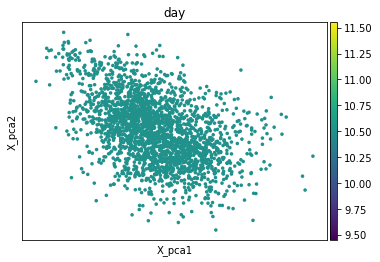

In [43]:
sc.pl.embedding(adata_50, basis='X_pca', color='day')